# Data Prep of the CA NFIP claims, from FEMA
##  Naomi Kalman
##  Last edited: 3/19/2023

This code loads the raw json file and cleans the data up to the point of making dummy variables for a linear regression.

__Note: please download the provided .json file to clean__


# Goals: 
- load the data from .json file
- clean the data of null values and outliers
- properly label categorical fields
- perform univariate and bivariate statistics
- export the clean data to use in a model

# 1. Load the data

In [46]:
#load packages to read the json
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
pd.set_option('display.max_columns', None)

In [48]:
#code from Intermediate Importing Data in Python, Hugo Bowne-Anderson
# Ch. 2: Interacting with APIs to import Data from the web, Video 1: Intro to APIs and JSON

#load packages to read the json
import pandas as pd
import json

#load the json file
with open('output3.json','r') as json_file:
    data = json.load(json_file)

#create a dataframe from the key
df = pd.DataFrame(data['FimaNfipClaims'])

In [49]:
#show how many rows and columns
df.shape

(50994, 40)

In [50]:
#view basic stats on numeric fields
df.describe()

,baseFloodElevation,basementEnclosureCrawlspace,policyCount,communityRatingSystemDiscount,elevationCertificateIndicator,elevationDifference,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,occupancyType,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss
count,3123.000000,7655.000000,50994.000000,36602.000000,8583.000000,3787.000000,50994.000000,2421.000000,50994.000000,50964.000000,50974.000000,32182.000000,10754.000000,239.000000,5.099400e+04,50994.000000,50994.000000
mean,245.393532,1.244024,1.056144,6.968690,1.532331,2.031423,1.907205,160.052747,14.397706,1.548838,1.533154,16807.407860,8716.425605,4210.449707,1.250889e+05,22949.390124,1995.548672
std,683.673587,1.261589,1.176135,2.184141,0.801477,15.407060,1.716057,485.808809,181.805616,0.788327,1.245331,32725.106958,17996.946425,9497.798127,2.284528e+05,43321.060591,11.218008
min,-8.000000,0.000000,1.000000,1.000000,1.000000,-123.000000,0.000000,-8.900000,-10.900000,1.000000,1.000000,-5387.050000,-1156.040000,0.000000,0.000000e+00,0.000000,1974.000000
25%,10.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1952.920000,1064.655000,0.000000,3.500000e+04,0.000000,1986.000000
50%,54.000000,1.000000,1.000000,7.000000,1.000000,1.000000,3.000000,26.800000,0.000000,1.000000,1.000000,6265.360000,3337.275000,0.000000,1.000000e+05,5000.000000,1995.000000
75%,116.000000,2.000000,1.000000,8.000000,2.000000,3.000000,3.000000,61.500000,0.000000,2.000000,1.000000,18563.870000,10000.000000,0.000000,1.850000e+05,30000.000000,2001.000000
max,9990.000000,4.000000,103.000000,10.000000,4.000000,595.000000,7.000000,6624.000000,9992.000000,6.000000,18.000000,945107.760000,500000.000000,30000.000000,2.480000e+07,500000.000000,2022.000000


In [51]:
#are there any duplicated records?
df.duplicated().sum()

0

In [52]:
#show the types and number of null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50994 entries, 0 to 50993
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   agricultureStructureIndicator               50994 non-null  bool   
 1   asOfDate                                    50994 non-null  object 
 2   baseFloodElevation                          3123 non-null   float64
 3   basementEnclosureCrawlspace                 7655 non-null   float64
 4   reportedCity                                50994 non-null  object 
 5   condominiumIndicator                        49884 non-null  object 
 6   policyCount                                 50994 non-null  int64  
 7   countyCode                                  50717 non-null  object 
 8   communityRatingSystemDiscount               36602 non-null  float64
 9   dateOfLoss                                  50994 non-null  object 
 10  elevatedBu

# 2. Describe the Data

In [53]:
#create a dataframe of the null value counts, name the column "count"
df_null = pd.DataFrame(df.isna().sum(), columns=['count'])

#add a column to calculate the percentage of null values
df_null['pct_null'] = round(df_null['count']/df.shape[0],4)*100

In [54]:
print(df_null)

                                            count  pct_null
agricultureStructureIndicator                   0      0.00
asOfDate                                        0      0.00
baseFloodElevation                          47871     93.88
basementEnclosureCrawlspace                 43339     84.99
reportedCity                                    0      0.00
condominiumIndicator                         1110      2.18
policyCount                                     0      0.00
countyCode                                    277      0.54
communityRatingSystemDiscount               14392     28.22
dateOfLoss                                      0      0.00
elevatedBuildingIndicator                       0      0.00
elevationCertificateIndicator               42411     83.17
elevationDifference                         47207     92.57
censusTract                                  1532      3.00
floodZone                                    6572     12.89
houseWorship                            

# 3. Preprocessing

Here I remove data fields that are not relevant to the analysis I was going to perform. Note that the order matters here, because as you remove columns and records the remaining values and categories change. Do the key indicators first. Dropping the non-residential properties first makes the claim amount part easier because there are fewer outliers.

Drop columns about geographic info such as lat/lon, zip code

Drop columns that are poorly populated, drop rows where key metrics are sparse, then see what else is missing.

In [55]:
#drop geo columns
geo_cols = ['reportedCity','countyCode','censusTract','latitude','longitude','reportedZipcode','state']
df.drop(columns=geo_cols, inplace=True)

#drop sparse columns 
sparse_cols = ['baseFloodElevation','basementEnclosureCrawlspace','elevationCertificateIndicator',\
    'elevationDifference','lowestAdjacentGrade','amountPaidOnIncreasedCostOfComplianceClaim',\
    'obstructionType','communityRatingSystemDiscount']
df.drop(columns=sparse_cols, inplace=True)

#drop date columns
date_cols = ['asOfDate','originalNBDate','dateOfLoss','yearOfLoss','originalConstructionDate']
df.drop(columns=date_cols, inplace=True)

#drop non-relevant columns
other_cols =['lowestFloorElevation','id','agricultureStructureIndicator','houseWorship',\
    'nonProfitIndicator','rateMethod','smallBusinessIndicatorBuilding']
df.drop(columns=other_cols, inplace=True)

In [56]:
#list the remaining columns
df.columns

Index(['condominiumIndicator', 'policyCount', 'elevatedBuildingIndicator',
       'floodZone', 'locationOfContents', 'numberOfFloorsInTheInsuredBuilding',
       'occupancyType', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim', 'postFIRMConstructionIndicator',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'primaryResidence'],
      dtype='object')

## Remove non-residential properties
Non-residential values are 4, 17, 18 and 19. see metadata at: https://www.fema.gov/openfema-data-page/fima-nfip-redacted-claims-v1

Values to remove are actually anything not 1 or 2 because everything else has different limits: 
https://www.fema.gov/sites/default/files/documents/fema_fim-3-how-to-write_apr2021.pdf

In [57]:
#keep only the residential records and display the value counts
#create a list of the residential occupancy codes
my_list = [1.0,2.0]
df = df.loc[df['occupancyType'].isin(my_list)]

#replace the numeric codes with their text values
occ_type_dict = {1.0:'single family',2.0:'2 to 4 unit bldg'}
df['occupancyType'].replace(occ_type_dict,inplace=True)

print(df['occupancyType'].value_counts())
print('Total remaining records:', df.shape[0])

single family       40071
2 to 4 unit bldg     3334
Name: occupancyType, dtype: int64
Total remaining records: 43405


## Handle null values and zero-dollar claims in the buildings and contents

Note: because null + number = null, need to fill the null values as zeros for the claim and insured amount columns. Then can do other processing, like divide by the number of policies, or add the two together

Building and contents policies are taken out separately, so add total coverage together

### impute the missing values

In [58]:
# fill the null values in building and contents claims with the number 0
df['amountPaidOnBuildingClaim'] = df['amountPaidOnBuildingClaim'].fillna(0)
df['amountPaidOnContentsClaim'] = df['amountPaidOnContentsClaim'].fillna(0)

### calculate the total damage and coverage
Drop records where total claim = 0; there should be a claim payment

Remove records with contents over 100k, buildings over 250k

In [59]:
#calculate the sum of the building and contents payment
df['dmg_total'] = df['amountPaidOnBuildingClaim'] + df['amountPaidOnContentsClaim']

#drop the records where total claim = 0
df = df.loc[df['dmg_total']>0]

#remove the claims over their individual maximums
df = df.loc[df['amountPaidOnBuildingClaim']<=250000]
df = df.loc[df['amountPaidOnContentsClaim']<=100000]

print('Records over $350,000 total: ' ,df.loc[df['dmg_total']>350000].shape[0])
print('Total remaining records:', df.shape[0])

Records over $350,000 total:  0
Total remaining records: 28361


### repeat for the coverage

In [60]:
# fill the null values in building and contents coverage with the number 0
df['totalBuildingInsuranceCoverage'] = df['totalBuildingInsuranceCoverage'].fillna(0)
df['totalContentsInsuranceCoverage'] = df['totalContentsInsuranceCoverage'].fillna(0)

#calculate the sum of the building and contents coverage
df['cov_total'] = df['totalBuildingInsuranceCoverage'] + df['totalContentsInsuranceCoverage']

## Drop records with policy count greater than 1

In [61]:
#drop records with multiple policies
df = df.loc[df['policyCount']==1]
print('Total remaining records:', df.shape[0])

Total remaining records: 28220


## Flood zone: drop any null values

In [62]:
#drop null flood zone
df.dropna(subset=['floodZone'],inplace=True)
print('Total remaining records:', df.shape[0])

Total remaining records: 24748


## Flood zone: group/rename the zones

Anything that starts with A should be A, anything B or X-Shaded should be B, C or X = C. D is its own category. V has the same hazard level as A but from a different flood action.

Use this glossary to map the flood zones
https://www.fema.gov/glossary/flood-zones

If creating categories from the zones: low (X,C), medium (B,X shaded), high(any A, any V). D is it's own category because it is "unknown".
https://www.fema.gov/sites/default/files/2020-08/fema_understanding-zone-D-levees.pdf

FEMA doesn't actually differentiate between X and X shaded in this datase. They are in two different columns in their flood shapefiles (downloaded map data). They have X listed in the metadata as either B, C or X, which means it isn't useful as an attribute. I am going to have to treat X as its own thing. There are also no dual flood zones listed. 

In [63]:
#create a new column called flood group
df['flood_group'] = df['floodZone']

#update the values that start with A
df.loc[df['floodZone'].str.contains('A'), 'flood_group'] = 'A'

#update the values that start with v
df.loc[df['floodZone'].str.contains('V'), 'flood_group'] = 'V'

#show results
df['flood_group'].value_counts()

A    15420
X     4138
C     3330
B     1229
V      462
D      169
Name: flood_group, dtype: int64

## check data sparsity and drop null values from remaining non-categorical fields

In [64]:
df.isna().sum()

condominiumIndicator                  39
policyCount                            0
elevatedBuildingIndicator              0
floodZone                              0
locationOfContents                     0
numberOfFloorsInTheInsuredBuilding     0
occupancyType                          0
amountPaidOnBuildingClaim              0
amountPaidOnContentsClaim              0
postFIRMConstructionIndicator          0
totalBuildingInsuranceCoverage         0
totalContentsInsuranceCoverage         0
primaryResidence                       0
dmg_total                              0
cov_total                              0
flood_group                            0
dtype: int64

# 4. Process categorical fields

## check the distribution of the values in all the categorical fields, perform univariate statistics

In [65]:
cat_cols = ['condominiumIndicator','elevatedBuildingIndicator','locationOfContents'\
    ,'numberOfFloorsInTheInsuredBuilding','occupancyType','postFIRMConstructionIndicator'\
    ,'primaryResidence','flood_group']

In [66]:
for col in cat_cols:
    print(df[col].value_counts().sort_index())

A       13
L        1
N    24525
U      170
Name: condominiumIndicator, dtype: int64
False    20865
True      3883
Name: elevatedBuildingIndicator, dtype: int64
0    9368
1       2
2    1582
3    9073
4    4242
5      43
6     141
7     297
Name: locationOfContents, dtype: int64
1.0    14542
2.0     7855
3.0     1745
4.0      441
5.0      164
6.0        1
Name: numberOfFloorsInTheInsuredBuilding, dtype: int64
2 to 4 unit bldg     2008
single family       22740
Name: occupancyType, dtype: int64
False    21683
True      3065
Name: postFIRMConstructionIndicator, dtype: int64
False    15545
True      9203
Name: primaryResidence, dtype: int64
A    15420
B     1229
C     3330
D      169
V      462
X     4138
Name: flood_group, dtype: int64


## Drop categories with fewer than 100 records, convert True/False to 1/0

CONDO INDICATOR

In [67]:
#inspect the value counts for condo indicator
df['condominiumIndicator'].value_counts().sort_index()

A       13
L        1
N    24525
U      170
Name: condominiumIndicator, dtype: int64

In [68]:
#drop records from categories with fewer than 100 counts
bad_condo = ['L','A']
df = df.loc[~df['condominiumIndicator'].isin(bad_condo)]
print('Total remaining records:', df.shape[0])

Total remaining records: 24734


ELEVATED BUILDING

In [69]:
#inspect the value counts for elevated building indicator
df['elevatedBuildingIndicator'].value_counts().sort_index()

False    20852
True      3882
Name: elevatedBuildingIndicator, dtype: int64

In [70]:
#convert true/false to 1/0
df['elevatedBuildingIndicator'].replace({False:0,True:1}, inplace=True)

LOCATION OF CONTENTS

In [71]:
#inspect the value counts for location of contents field
df['locationOfContents'].value_counts().sort_index()

0    9362
1       2
2    1582
3    9070
4    4237
5      43
6     141
7     297
Name: locationOfContents, dtype: int64

In [72]:
#remove categories of locations with sparse entries
bad_loc = ['1','5']
df = df.loc[~df['locationOfContents'].isin(bad_loc)]
print('Total remaining records:', df.shape[0])

Total remaining records: 24689


In [73]:
#map the location of contents to descriptive text
#create a dictionary
loc_cont_dict = {0:np.NaN, 1:'Subgrade only', 2:'Subgrade and above',\
    3:'Lowest floor only',4:'Lowest floor and above',\
    5:'More than one floor above',6:'Mobile home',7:'Enclosure and above'}

#replace the values using the dictionary
df['locationOfContents'].replace(loc_cont_dict, inplace=True)

#show the value counts again
df['locationOfContents'].value_counts()

Lowest floor only         9070
Lowest floor and above    4237
Subgrade and above        1582
Enclosure and above        297
Mobile home                141
Name: locationOfContents, dtype: int64

NUMBER OF FLOORS

In [74]:
# replace the codes with text for number of floors
floors_dict = {1.0:'one',2.0:'two',3.0:'three or more',4.0:'split level',\
    5.0:'mobile home',6.0:'townhome'}
df['numberOfFloorsInTheInsuredBuilding'].replace(floors_dict, inplace=True)

#inspect the value counts for number of floors field
df['numberOfFloorsInTheInsuredBuilding'].value_counts()

one              14534
two               7819
three or more     1730
split level        441
mobile home        164
townhome             1
Name: numberOfFloorsInTheInsuredBuilding, dtype: int64

In [75]:
#remove the townhome category
df = df.loc[df['numberOfFloorsInTheInsuredBuilding']!='townhome']
print('Total remaining records:', df.shape[0])

Total remaining records: 24688


POST-FIRM INDICATOR

In [76]:
#convert true/false to 1/0
df['postFIRMConstructionIndicator'].replace({False:0,True:1}, inplace=True)

#inspect the value counts for the post-FIRM construction indicator
df['postFIRMConstructionIndicator'].value_counts()

0    21631
1     3057
Name: postFIRMConstructionIndicator, dtype: int64

PRIMARY RESIDENCE

In [77]:
#convert true/false to 1/0
df['primaryResidence'].replace({False:0,True:1}, inplace=True)

#inspect the value counts for the primary residence indicator
df['primaryResidence'].value_counts()

0    15497
1     9191
Name: primaryResidence, dtype: int64

## check data sparsity

In [78]:
#check data sparsity in the predictor variables and overall dataset
#predictor variables
X = df.loc[:,['condominiumIndicator','elevatedBuildingIndicator','locationOfContents'\
    ,'numberOfFloorsInTheInsuredBuilding','occupancyType','postFIRMConstructionIndicator'\
    ,'primaryResidence','flood_group','cov_total']]

print("total remaining records:", X.shape[0])
print("sparsity by column:\n", X.isna().sum())
#total sparsity is the sum of the sum of the null values in each column
#divided by the total size of the matrix
print("total data sparsity: ", X.isna().sum().sum()/(X.shape[0]*X.shape[1]))

total remaining records: 24688
sparsity by column:
 condominiumIndicator                    38
elevatedBuildingIndicator                0
locationOfContents                    9361
numberOfFloorsInTheInsuredBuilding       0
occupancyType                            0
postFIRMConstructionIndicator            0
primaryResidence                         0
flood_group                              0
cov_total                                0
dtype: int64
total data sparsity:  0.04230125297040398


# 5. Plot univariate stats for cleaned fields

### Continuous variables

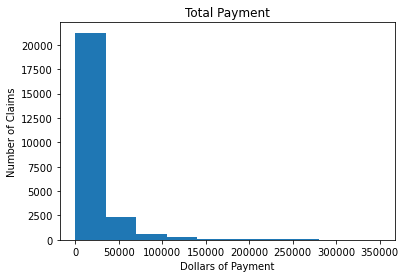

In [79]:
import matplotlib.pyplot as plt

#univariate statistics, continuous variables
#histogram of the target variable
plt.hist(df['dmg_total'])
plt.title("Total Payment")
plt.xlabel("Dollars of Payment")
plt.ylabel("Number of Claims")
plt.show()

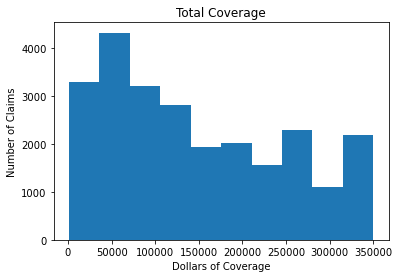

In [80]:
#univariate statistics, continuous variables
#histogram of total coverage (response variable)
plt.hist(df['cov_total'])
plt.title("Total Coverage")
plt.xlabel("Dollars of Coverage")
plt.ylabel("Number of Claims")
plt.show()

### Categorical Variables

In [81]:
#list the categorical columns
cat_cols = ['condominiumIndicator','elevatedBuildingIndicator','locationOfContents'\
    ,'numberOfFloorsInTheInsuredBuilding','occupancyType','postFIRMConstructionIndicator'\
    ,'primaryResidence','flood_group']

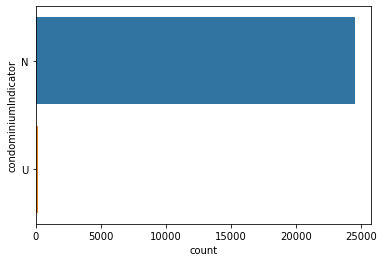

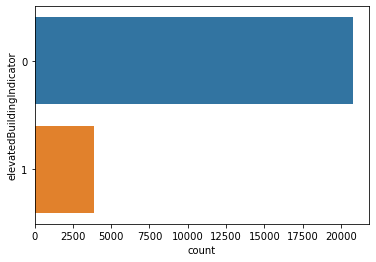

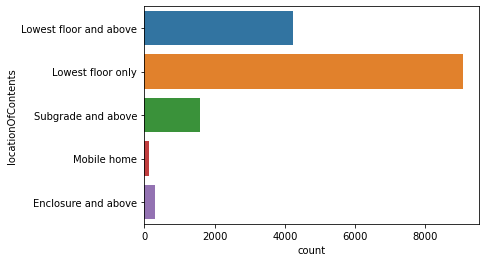

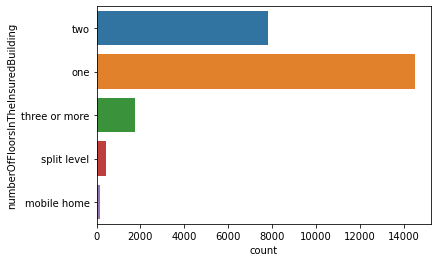

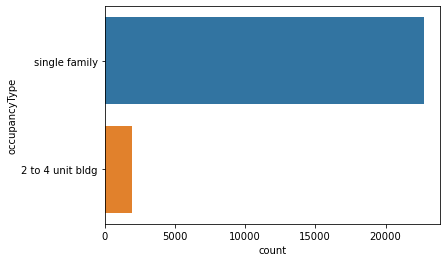

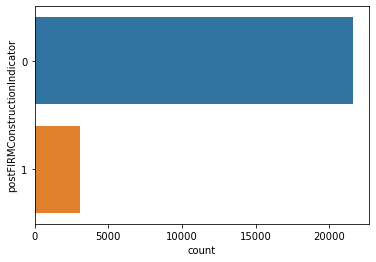

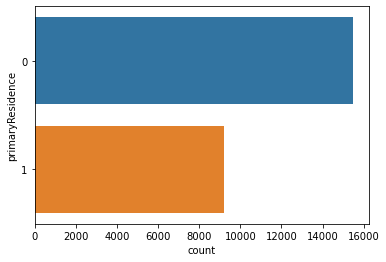

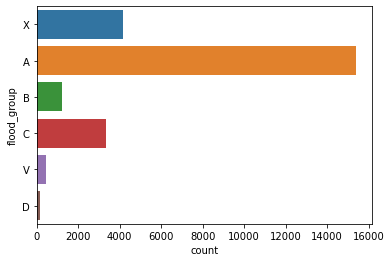

In [82]:
#univariate statistics
import seaborn as sns

for col in cat_cols:
    sns.countplot(y=df[col], data=df)
    plt.show()

# 6. Plot bivariate stats for cleaned data

### Continous variables

<AxesSubplot:xlabel='cov_total', ylabel='dmg_total'>

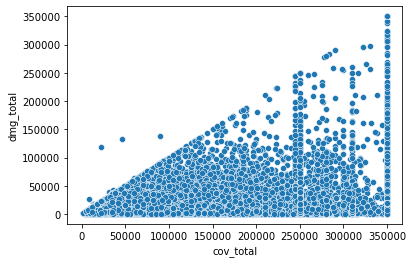

In [83]:
#bivariate plot for continuous variables
sns.scatterplot(x=df['cov_total'],y=df['dmg_total'],data=df)

### Categorical variables

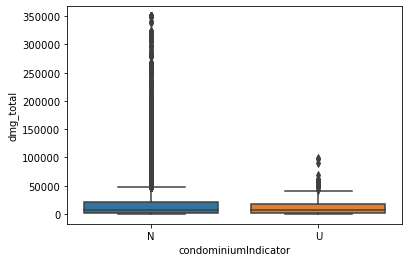

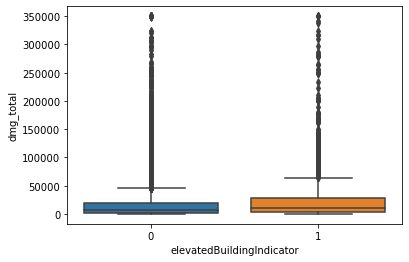

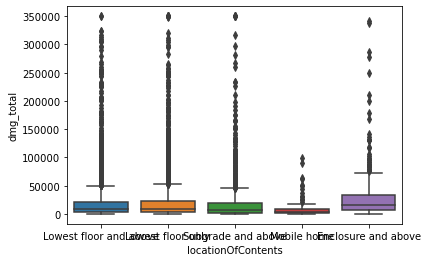

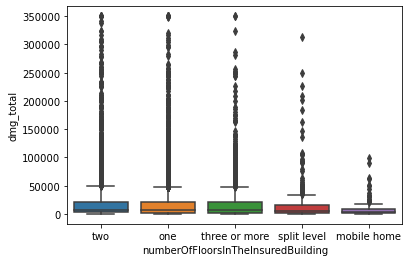

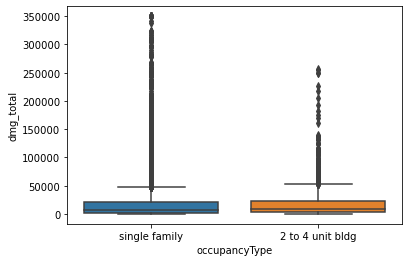

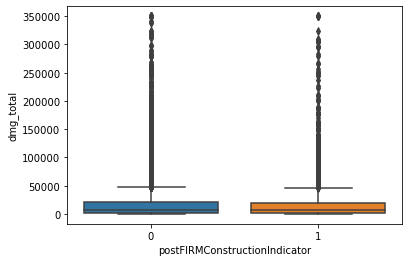

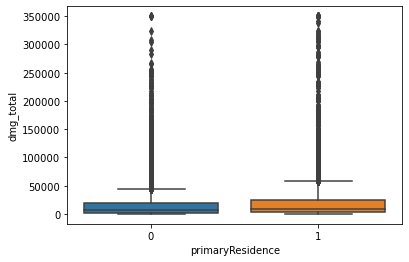

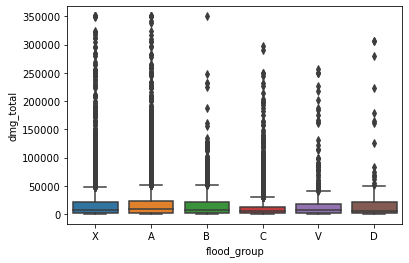

In [84]:
#use the same list as above to loop through and make boxplots
for col in cat_cols:
    sns.boxplot(x=col,y='dmg_total',data=df)
    plt.show()

# 7. Export the dataset

In [85]:
#Simplify the columns names to make dummy variables easier to read
new_col_names = {'condominiumIndicator':'condo','elevatedBuildingIndicator':'elevated'\
    ,'numberOfFloorsInTheInsuredBuilding':'num_floors','postFIRMConstructionIndicator':'post_firm'\
    ,'amountPaidOnBuildingClaim':'dmg_bldg','amountPaidOnContentsClaim':'dmg_contents'\
    ,'totalBuildingInsuranceCoverage':'cov_bldg','totalContentsInsuranceCoverage':'cov_contents'}

df.rename(columns=new_col_names, inplace=True)

In [86]:
#review the result
df.head()

,condo,policyCount,elevated,floodZone,locationOfContents,num_floors,occupancyType,dmg_bldg,dmg_contents,post_firm,cov_bldg,cov_contents,primaryResidence,dmg_total,cov_total,flood_group
0,N,1,0,X,NaN,two,single family,2260.90,0.00,0,185000,60000,0,2260.90,245000,X
1,N,1,0,X,NaN,one,single family,12183.13,0.00,0,250000,100000,1,12183.13,350000,X
2,N,1,0,AO,NaN,one,single family,42858.09,32886.55,0,203500,63000,1,75744.64,266500,A
4,N,1,0,X,Lowest floor and above,two,single family,9765.99,0.00,0,250000,100000,1,9765.99,350000,X
6,N,1,0,AE,NaN,one,single family,52103.49,30000.00,0,173700,30000,1,82103.49,203700,A


In [87]:
#export to .csv to use for analysis
df.to_csv('df_clean.csv')